<a href="https://colab.research.google.com/github/Ganesh9100/Transfer-Learning/blob/master/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
! unzip /content/Deep-Learning-Car-Brand/Datasets.zip

In [ ]:
#re-size all the images to this
IMAGE_SIZE = [224, 224]  # why bcz by default resnet takes 224 224 as like yolo has multiple of 32 greater than 416
# but you can give anzie but adivsabel si

train_path = '/content/Datasets/Train'
valid_path = '/content/Datasets/Test'

https://keras.io/api/applications/resnet/#resnet50-function

In [ ]:
# [224,224]+[3] means height width and the RGB channel 
# include_top = false because the resnet o/ps 1000 classes this will remove the last 
#whether to include the fully-connected layer at the top of the network.
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# since they have used batch normalization it has both trainable and non trainable params 

**In the above summary you can see the first layer and the last layer has been altered because the include_top we have given as false and you can see the input shape has also been changed**

In [ ]:
# this glob will say how many folders are present
folders = glob('/content/Datasets/Train/*')
print(folders)

['/content/Datasets/Train/mercedes', '/content/Datasets/Train/audi', '/content/Datasets/Train/lamborghini']


In [ ]:
print(resnet.output)# so we have to flattent he last convolution ofg the resnt architecture , and he last cnn layer has bellow shape

Tensor("conv5_block3_out/Identity:0", shape=(None, 7, 7, 2048), dtype=float32)


In [ ]:
resnet.layers # this will be the all the layers in resnet 

In [ ]:
# we are here not going to train the weights or to say we are not going to update ht weights in resent 
# we will be using it directly to predict out model
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
x=Flatten()(resnet.output)
print(x)# 7x7x2048

Tensor("flatten/Identity:0", shape=(None, 100352), dtype=float32)


In [ ]:
7*7*2048

100352

In [ ]:
print(len(folders))# as it represents the no of o/p class .

3


In [ ]:
resnet.input

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)  # creating a o/p layer 

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
100352*3

301056

In [ ]:
# here we will be training only the output node which has 301059 parameters 

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, # divide all the pixel val by 255
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# we should never do data agumentation in test data .
test_datagen = ImageDataGenerator(rescale = 1./255)



Takes the path to a directory & generates batches of augmented data.

https://keras.io/api/preprocessing/image/



In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
len(test_set)

2

In [ ]:
#fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=45,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/45
2/2 [==============================] - 15s 7s/step - loss: 4.9080 - accuracy: 0.3438 - val_loss: 5.0222 - val_accuracy: 0.3276
Epoch 2/45
2/2 [==============================] - 13s 7s/step - loss: 8.8649 - accuracy: 0.3594 - val_loss: 2.7222 - val_accuracy: 0.5172
Epoch 3/45
2/2 [==============================] - 14s 7s/step - loss: 3.3765 - accuracy: 0.3125 - val_loss: 9.0818 - val_accuracy: 0.1552
Epoch 4/45
2/2 [==============================] - 15s 8s/step - loss: 7.0713 - accuracy: 0.3281 - val_loss: 8.0766 - val_accuracy: 0.1552
Epoch 5/45
2/2 [==============================] - 13s 7s/step - loss: 4.5991 - accuracy: 0.3750 - val_loss: 5.5621 - val_accuracy: 0.3276
Epoch 6/45
2/2 [==============================] - 13s 7s/step - loss: 3.1789 - accuracy: 0.3906 - val_loss: 2.3575 - val_accuracy: 0.5172
Epoch 7/45
2/2 [==============================] - 13s 7s/step - loss: 3.4694 - accuracy: 0.3750 

**BIAS** MEANS LOSS IN TRAINING DATA 
**VARIANCE** MEANS LOSS IN TEST DATA 

WE SHOULD NOT HAVE HIGH VARIANCE AND AND LOW BIAS **-OVERFITTING**
 
 WE SHOULD NOT HAVE LOW VARIANCE AND HIGH BIAS **-UNDERFITTING**

 USUALLY UNDERFITING CAUSE IS LOW DATA FOR TRAINING 

 GOOD MODEL SHOULD HAVE LOW BIAS AND LOW VARIANCE

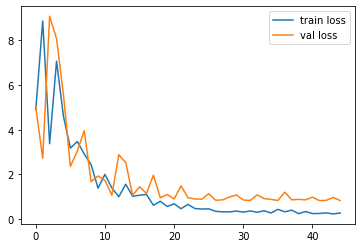

<Figure size 432x288 with 0 Axes>

In [ ]:
#plotting 
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


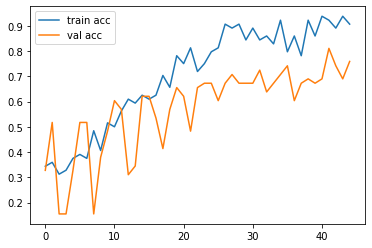

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('CAR_CLASS_MODEL_resnet50.h5') # HIERARCHICAL DATA FORMAT

In [ ]:
PREDICT=model.predict(test_set)

In [ ]:
PREDICT

array([[8.5118450e-03, 9.7535014e-01, 1.6138056e-02],
       [1.1141051e-01, 7.3187298e-01, 1.5671647e-01],
       [6.4956439e-01, 3.4396362e-01, 6.4719641e-03],
       [1.1473613e-04, 9.9454319e-01, 5.3420779e-03],
       [1.4080555e-02, 9.5314068e-01, 3.2778807e-02],
       [8.3850570e-02, 8.9555919e-01, 2.0590261e-02],
       [2.3646116e-01, 5.3653401e-01, 2.2700477e-01],
       [1.7248282e-02, 8.0370587e-01, 1.7904581e-01],
       [2.1102523e-02, 4.8671803e-01, 4.9217945e-01],
       [5.0091926e-02, 4.7639981e-01, 4.7350818e-01],
       [2.0866254e-03, 9.8169106e-01, 1.6222304e-02],
       [4.7632907e-02, 8.3245754e-01, 1.1990961e-01],
       [1.8045747e-01, 7.8934884e-01, 3.0193672e-02],
       [3.6687966e-02, 1.4090423e-02, 9.4922155e-01],
       [1.1096149e-03, 9.8373115e-01, 1.5159241e-02],
       [1.3900797e-01, 3.2421657e-01, 5.3677541e-01],
       [7.0959721e-03, 4.1135386e-02, 9.5176864e-01],
       [4.2404257e-02, 5.7370132e-03, 9.5185870e-01],
       [8.7507322e-02, 2.224

In [ ]:
# it will show the probablity of each class 
"""
so we need the highest probablity 
we can use argmax in numpy function """



In [ ]:
import numpy as np
y_pred = np.argmax(PREDICT, axis=1)

In [ ]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1,
       0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2])

In [51]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [53]:
model=load_model('/content/CAR_CLASS_MODEL_resnet50.h5')

In [54]:
test_img=image.load_img('/content/tteesstt.jpg',target_size=(224,224))

In [56]:

x=image.img_to_array(test_img)

x=x/255

In [57]:
x.shape

(224, 224, 3)

In [58]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [61]:

model.predict(img_data)

array([[7.8815303e-04, 6.1148033e-04, 9.9860042e-01]], dtype=float32)

In [59]:

a=np.argmax(model.predict(img_data), axis=1)

In [62]:
a # 9.9860042e-01 has highest prob

array([2])